In [1]:
import sys
sys.path.append("../utils")
import utils as ut
import numpy as np
from rich import print as print_rich

# PROBLEMA 1 
### LIBRO ANÁLISIS MATRICIAL DE ESTRUCTURAS - ALDER QUISPE

Para la siguiente estructura, hallar la matriz de rigidez global de cada barra. 

Considerar:
* $Área = 25 \quad cm^2$
* $E = 2x10^6 \quad kgf/cm^2$

Coordenadas:
* $A = (0, 0)$
* $B = (3, 0)$
* $C = (6, 0)$
* $D = (1.5, 1)$
* $E = (3, 2)$
* $F = (4.5, 1)$

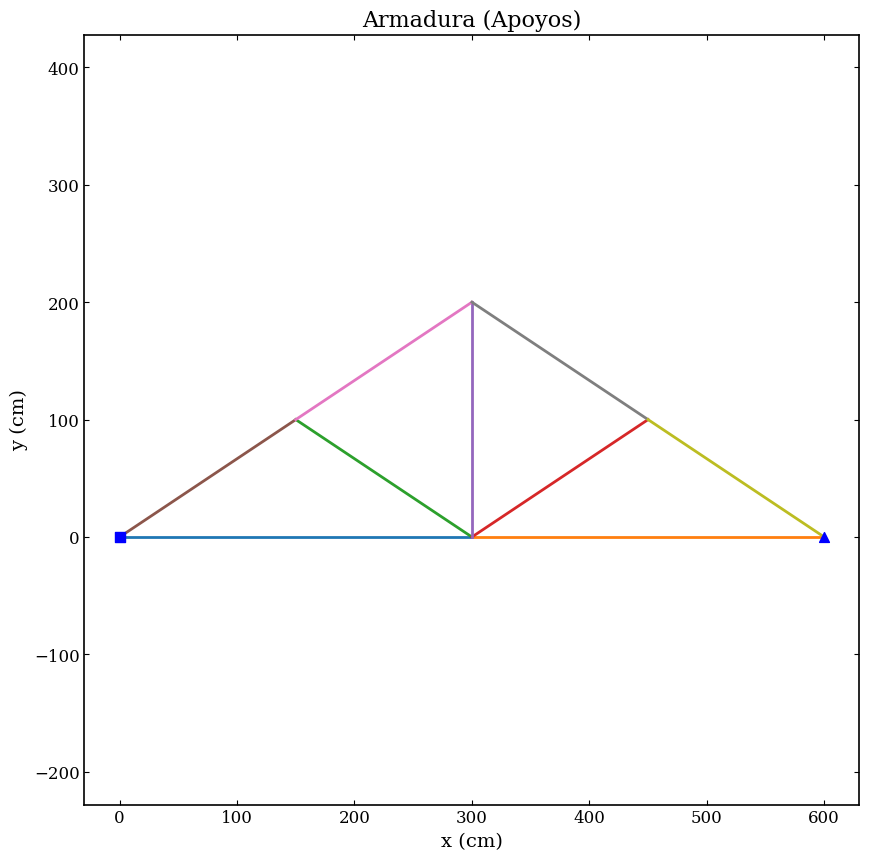

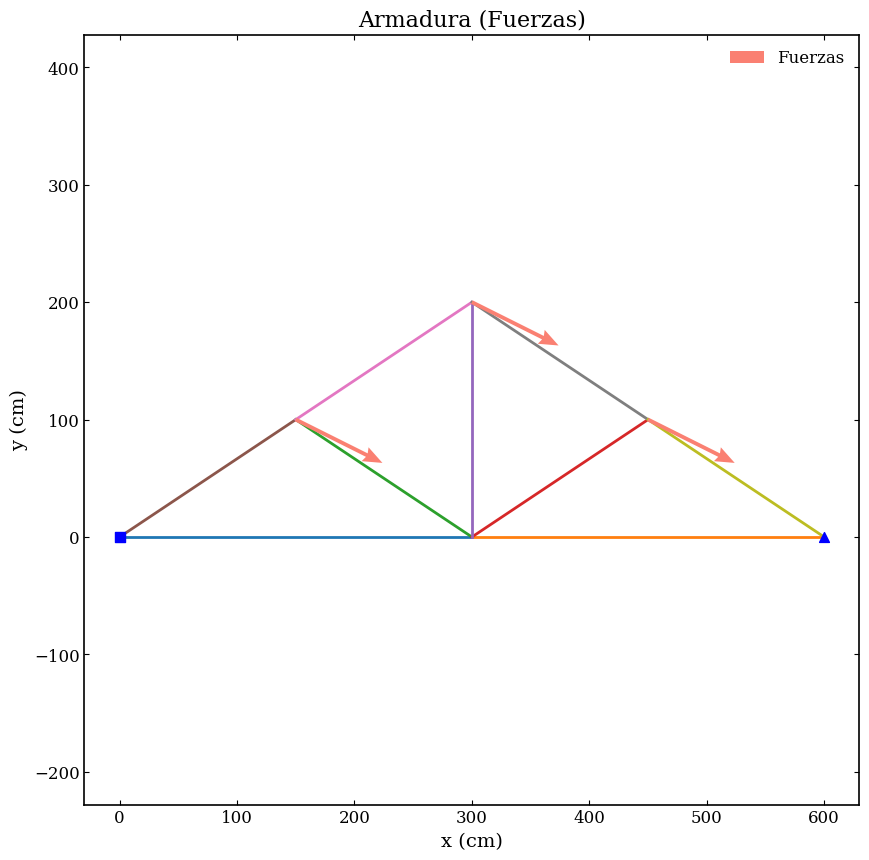

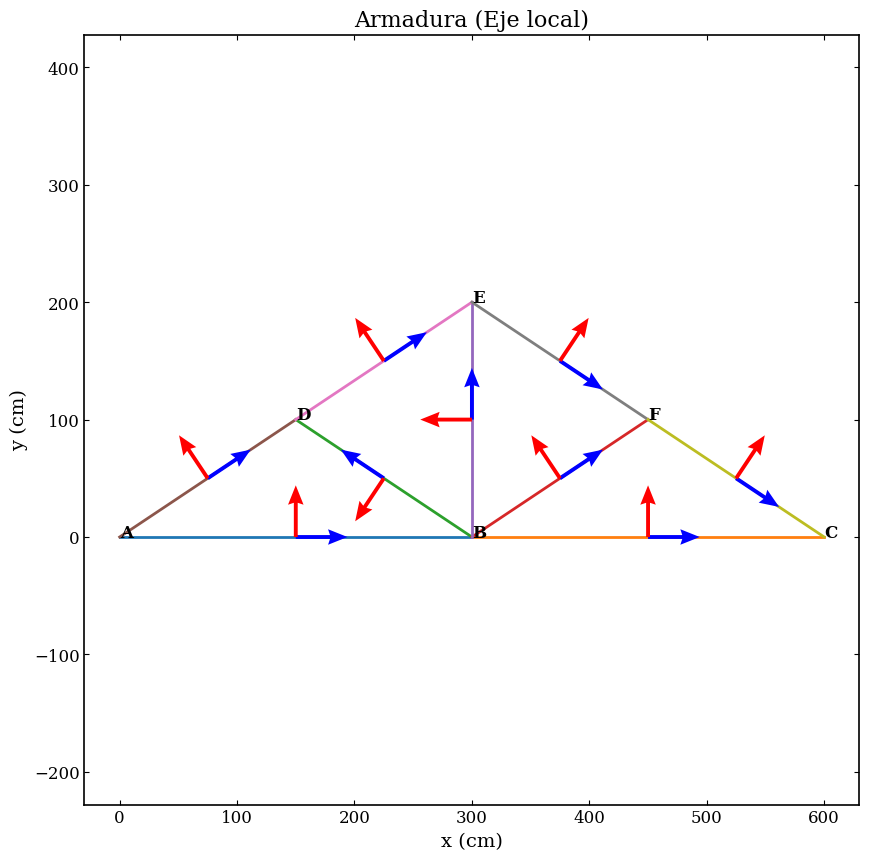

In [2]:
#Propiedades
A = 25  #cm^2
E = 2e6 #kgf/cm^2

und_long = "cm"
und_fuer = "kgf"


# Coordenadas
coords = {  "A":[0, 0],
            "B":[300, 0],
            "C":[600, 0],
            "D":[150, 100],
            "E":[300, 200],
            "F":[450, 100]
        }

barras = [["A", "B", A, E], 
          ["B", "C", A, E], 
          ["B", "D", A, E], 
          ["B", "F", A, E], 
          ["B", "E", A, E],
          ["A", "D", A, E],
          ["D", "E", A, E],
          ["E", "F", A, E],
          ["F", "C", A, E]
          ]

# Verificar barras duplicadas
for i, j, _, _ in barras:
        ij=i+j
        ji=j+i
        contador = 0 # contador de elementos duplicados, si llega a dos significa que hay un elemento duplicado
        for m, n, _, _ in barras:
                mn=m+n
                if mn == ij or mn == ji:
                        contador += 1
                if contador == 2:
                        print(f"Elemento duplicado: {ij}")

# Fuerzas
Fuerzas = {"D":[2e3, -1e3],
           "E":[2e3, -1e3],
           "F":[2e3, -1e3]}

# Restricciones [0 = x , 1 = y, 2 = [x, y]]
restricciones = {"A": 2,
                 "C": 1}

ut.grafico_t0(coords, barras, restricciones, Fuerzas,"Armadura (Apoyos)", f"x ({und_long})", f"y ({und_long})", False, False, True, False, None,(10,10))  #View(Nodo, Fuerza, Apoyo, Eje local)
ut.grafico_t0(coords, barras, restricciones, Fuerzas,"Armadura (Fuerzas)", f"x ({und_long})", f"y ({und_long})", False, True, True, False, None,(10,10))
ut.grafico_t0(coords, barras, restricciones, Fuerzas,"Armadura (Eje local)", f"x ({und_long})", f"y ({und_long})", True, False, False, True, escala_ejes_l=15, tamaño_fig=(10,10))

# Matriz de rigiz de cada elemento
Matriz de rigidez de cada barra en coordenadas locales y globales.

In [3]:
# Diccionario de Matriz c. local
matriz_local = {}

# Diccionario de Matriz en c. global
matriz_global = {}


for i, f, As, Es in barras:
    xi, yi = coords[i]
    xf, yf = coords[f]
    kl, kg=ut.matriz_rigidez(As, Es, xi, xf, yi, yf)

    nombre = i + f

    matriz_local[nombre] = kl
    matriz_global[nombre] = kg



Locales

In [4]:
for j,i in enumerate(matriz_local):
    ut.matriz_print_latex(j+1, matriz_local[i], "Local", i, 3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Globales

In [5]:
for j, i in enumerate(matriz_global):
    ut.matriz_print_latex(j+1, matriz_global[i], "Global", i, 3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Grados de libertad de cada barra

In [6]:
# Nodos Nombres
nodos_name = list(coords.keys())
dict_GDL = matriz_global.copy()

for j, i in enumerate(matriz_global):
    lista_temporal = list(i)

    # Posicionamiento
    Posicionamiento = [nodos_name.index(item) for item in lista_temporal]

    # Grados de Libertad Correspondientes
    grados_libertad_corr = [ Posicionamiento[0]*2, Posicionamiento[0]*2+1, Posicionamiento[1]*2, Posicionamiento[1]*2+1 ]
    dict_GDL[i] = grados_libertad_corr

    #Print
    ut.matriz_print_latex(j+1, grados_libertad_corr, "GDL", "", 0, i)

    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# GDL Restricciones

In [7]:
# Lista de GDL Restringidos
restricciones_GDL = []

for i in restricciones:
    # Posicionamiento de nodo restringido
    pos_res = nodos_name.index(i)

    # Condicción de apoyo
    grados_libertad_corr = []
    if restricciones[i] == 0 or restricciones[i] == 2:
        grados_libertad_corr.append(pos_res*2)
    if restricciones[i] == 1 or restricciones[i] == 2:
        grados_libertad_corr.append(pos_res*2+1)

    restricciones_GDL.extend(grados_libertad_corr) 

# Print
ut.matriz_print_latex("A", restricciones_GDL, "GDL","", 0, "Restringidos")   

<IPython.core.display.Math object>

# Ensamblando Matriz de rigidez Global del sistema

In [8]:
k_sistema = ut.esambladora(coords, matriz_global, dict_GDL)

ut.matriz_print_latex("A", k_sistema, "K", "", 2,"Sistema")

<IPython.core.display.Math object>

# Vector de fuerzas aplicadas y sus GDL

In [9]:
GDL_fuerzas_aplicadas = []
Vector_fuerzas = np.zeros((len(coords)*2))
for f in Fuerzas:
    nodo_pos = nodos_name.index(f)
    GDL_nodo_temp = [nodo_pos*2, nodo_pos*2+1]
    GDL_fuerzas_aplicadas.extend(GDL_nodo_temp)
    Vector_fuerzas[GDL_nodo_temp] = Fuerzas[f]

ut.matriz_print_latex("A", Vector_fuerzas[GDL_fuerzas_aplicadas], "F", "", 2,"Aplicadas")
ut.matriz_print_latex("B", GDL_fuerzas_aplicadas, "F", "", 0,"GDL")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Grados de libertad

In [10]:
GDL_total = np.arange(len(coords)*2)
GDL_libres = np.setdiff1d(GDL_total, restricciones_GDL)

# Matriz de rigidez Global del sistema Libres

In [11]:
rango_libres_k = np.ix_(GDL_libres, GDL_libres)
ut.matriz_print_latex("A", k_sistema[rango_libres_k], "K", "", 2, "Sistema \\quad Libre")

<IPython.core.display.Math object>

# CALCULO DE DESPLAMIENTOS

Por Hooke:

* $K_{global} \cdot \Delta u = F_{global}$
* $k_{libres} \cdot \Delta u_{libres} = F_{libres}$



In [12]:
# Hooke
u_desp = np.zeros((len(coords)*2))

u_desp[GDL_libres] = Vector_fuerzas[GDL_libres].T @ np.linalg.inv(k_sistema[rango_libres_k])

In [13]:
dict_despl = {}
for n, i in enumerate(nodos_name):
    GDL_inv = np.ix_([n*2, n*2+1])
    dict_despl[i] = u_desp[GDL_inv]

print(f"Desplazamientos Nodales ({und_long}):")
print_rich(dict_despl)

Desplazamientos Nodales (cm):


{
    'A': array([0., 0.]),
    'B': array([ 0.0375   , -0.0805451]),
    'C': array([0.063, 0.   ]),
    'D': array([ 0.04950438, -0.07620958]),
    'E': array([ 0.04712406, -0.0765451 ]),
    'F': array([ 0.03511967, -0.07502161])
}

# Reacciones

In [14]:
Vector_fuerzas =  k_sistema @ u_desp.T

dict_vector_fuerzas = {}
for n, i in enumerate(nodos_name):
    GDL_inv = np.ix_([n*2, n*2+1])
    dict_vector_fuerzas[i] = Vector_fuerzas[GDL_inv]

print(f"Fuerzas en los Nodos ({und_fuer}):")
print_rich(dict_vector_fuerzas)

Fuerzas en los Nodos (kgf):


{
    'A': array([-6000.        ,   166.66666667]),
    'B': array([-1.25055521e-12,  5.68434189e-12]),
    'C': array([5.45696821e-12, 2.83333333e+03]),
    'D': array([ 2000., -1000.]),
    'E': array([ 2000., -1000.]),
    'F': array([ 2000., -1000.])
}

# Deformación Unitaria, Esfuerzos Internos y Fuerzas Normales

In [15]:
dict_def_unitaria = {}
dict_esfuerzo = {}
dict_normal = {}
for i, f, As, Es in barras:
    xi, yi = coords[i]
    xf, yf = coords[f]
    despl_temp = np.concatenate((dict_despl[i], dict_despl[f]))
    e_unitaria = ut.deformación_unitaria(xi, xf, yi, yf, despl_temp)
    dict_def_unitaria[i+f] = e_unitaria
    dict_esfuerzo[i+f] = Es*e_unitaria
    dict_normal[i+f] = As*Es*e_unitaria

print(f"Defomaciones unitarias en las barras ({und_long}/{und_long}):")
print_rich(dict_def_unitaria)

print(f"Esfuerzos en las barras ({und_fuer}/{und_long}^2):")
print_rich(dict_esfuerzo)

print(f"Normales en las barras ({und_fuer}):")
print_rich(dict_normal)



Defomaciones unitarias en las barras (cm/cm):


{
    'AB': np.float64(0.00012499999999999995),
    'BC': np.float64(8.500000000000006e-05),
    'BD': np.float64(-4.206476488041317e-05),
    'BF': np.float64(6.009252125773258e-06),
    'BE': np.float64(1.9999999999999968e-05),
    'AD': np.float64(-6.009252125773315e-06),
    'DE': np.float64(-1.2018504251546586e-05),
    'EF': np.float64(-6.0092521257733185e-05),
    'FC': np.float64(-0.00010215728613814628)
}

Esfuerzos en las barras (kgf/cm^2):


{
    'AB': np.float64(249.9999999999999),
    'BC': np.float64(170.0000000000001),
    'BD': np.float64(-84.12952976082634),
    'BF': np.float64(12.018504251546517),
    'BE': np.float64(39.999999999999936),
    'AD': np.float64(-12.018504251546629),
    'DE': np.float64(-24.037008503093173),
    'EF': np.float64(-120.18504251546636),
    'FC': np.float64(-204.31457227629255)
}

Normales en las barras (kgf):


{
    'AB': np.float64(6249.999999999997),
    'BC': np.float64(4250.000000000003),
    'BD': np.float64(-2103.238244020659),
    'BF': np.float64(300.4626062886629),
    'BE': np.float64(999.9999999999984),
    'AD': np.float64(-300.46260628866577),
    'DE': np.float64(-600.9252125773293),
    'EF': np.float64(-3004.6260628866594),
    'FC': np.float64(-5107.864306907314)
}

# GRAFICAR DEFORMARMADA Y TIPO DE DEFORMACIÓN

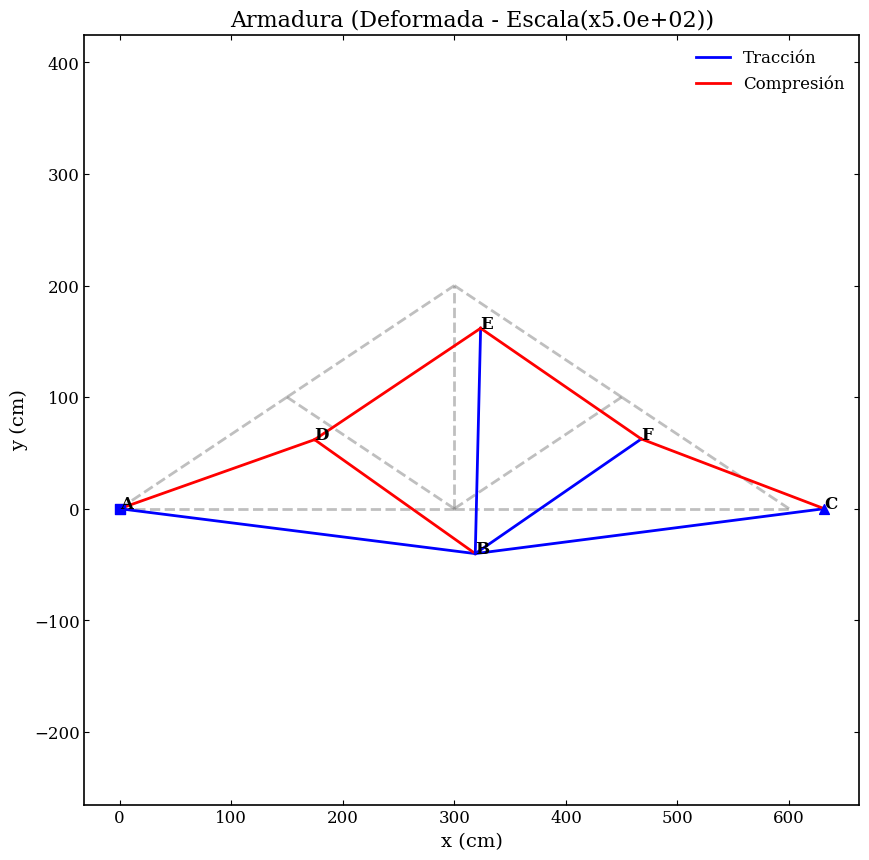

In [16]:
escala_def = 500
ut.grafico_desf(coords, barras, restricciones, dict_despl, escala_def, dict_normal,f"Armadura (Deformada - Escala(x{escala_def:.1e}))", f"x ({und_long})", f"y ({und_long})", True, True, True, (10,10)) # (Nodo, apoyo, Estr. Original)